In [ ]:
from IPython.core.display import publish_display_data
!pip install pycaret
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt

## EDA

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/PedroPavanii/plane_crash/main/Plane%20Crashes.csv')

In [3]:
df.columns


Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')

In [4]:
df = df.drop(['MSN', 'YOM', 'Time','Registration', 'Schedule', 'Flight no.', 'Crash location',
         'Other fatalities','Circumstances', 'Region', 'Flight phase'], axis=1)

In [5]:
df.isnull().sum(axis=0)

Date                   0
Aircraft               1
Operator               0
Flight type           57
Survivors           1297
Crash site           383
Country                1
Crew on board         24
Crew fatalities        1
Pax on board          54
PAX fatalities         1
Total fatalities       0
Crash cause            0
dtype: int64

In [6]:
df['Flight type'] = df['Flight type'].str.replace('Scheduled Revenue Flight', 'Airline Flight')
df['Flight type'] = df['Flight type'].str.replace('Survey / Patrol / Reconnaissance', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Bombing', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Fire fighting', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Survey / Patrol / Reconnaissance', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Aerial photography', 'Military')
df['Flight type'] = df['Flight type'].str.replace('Delivery', 'Government')
df['Flight type'] = df['Flight type'].str.replace('Postal (mail)', 'Government')
df['Flight type'] = df['Flight type'].str.replace('Charter/Taxi (Non Scheduled Revenue Flight)', 'Private')
df['Flight type'] = df['Flight type'].str.replace('Executive/Corporate/Business', 'Private')
df['Flight type'] = df['Flight type'].replace('Postal (mail)', 'Government')
df['Flight type'] = df['Flight type'].replace('Charter/Taxi (Non Airline Flight)','Private')

<ipython-input-6-04c7f481efa5>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Flight type'] = df['Flight type'].str.replace('Postal (mail)', 'Government')
<ipython-input-6-04c7f481efa5>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Flight type'] = df['Flight type'].str.replace('Charter/Taxi (Non Scheduled Revenue Flight)', 'Private')


In [11]:
df = df.dropna()

## Modeling

In [12]:
from pycaret.classification import *

s = setup(df, target = 'Survivors', session_id = 42, normalize=True)   



,Description,Value
0,Session id,42
1,Target,Survivors
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(27066, 13)"
5,Transformed data shape,"(27066, 45)"
6,Transformed train set shape,"(18946, 45)"
7,Transformed test set shape,"(8120, 45)"
8,Numeric features,5
9,Categorical features,7


In [13]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8037,0.8754,0.8337,0.8239,0.8287,0.5989,0.5992,5.0010
lightgbm,Light Gradient Boosting Machine,0.8005,0.8216,0.8227,0.8264,0.8245,0.5934,0.5936,1.4820
rf,Random Forest Classifier,0.7949,0.9021,0.8222,0.8188,0.8204,0.5815,0.5817,2.5730
svm,SVM - Linear Kernel,0.7870,0.0000,0.8582,0.7873,0.8211,0.5592,0.5626,1.5450
gbc,Gradient Boosting Classifier,0.7777,0.8294,0.8070,0.8038,0.8053,0.5464,0.5466,4.8070
lr,Logistic Regression,0.7768,0.8423,0.8538,0.7770,0.8134,0.5374,0.5414,1.8730
et,Extra Trees Classifier,0.7727,0.8703,0.7975,0.8023,0.7998,0.5368,0.5370,2.7890
ada,Ada Boost Classifier,0.7650,0.7831,0.7808,0.8020,0.7910,0.5227,0.5235,1.8820
dt,Decision Tree Classifier,0.7502,0.7419,0.8018,0.7699,0.7853,0.4870,0.4879,1.1650
knn,K Neighbors Classifier,0.7081,0.7577,0.7841,0.7255,0.7536,0.3967,0.3986,1.6810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [14]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


In [15]:
tuned_model = tune_model(best,n_iter=20, fold = 3,choose_better = True,optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6077,0.5688,0.9586,0.5968,0.7357,0.1131,0.1808
1,0.6101,0.5164,0.9644,0.5978,0.7381,0.1173,0.1917
2,0.6106,0.5736,0.9522,0.5996,0.7358,0.1224,0.1866
Mean,0.6095,0.5529,0.9584,0.5981,0.7365,0.1176,0.1864
Std,0.0013,0.0259,0.0050,0.0011,0.0011,0.0038,0.0045


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

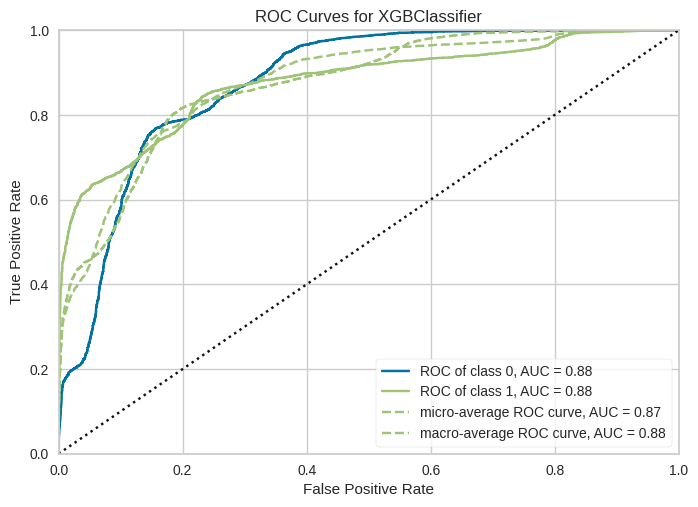

In [17]:
plot_model(best, plot = 'auc')

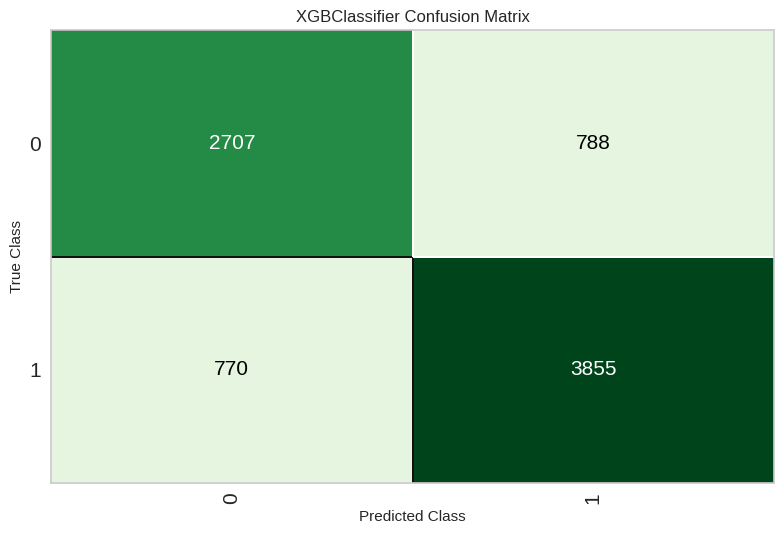

In [18]:
plot_model(best, plot = 'confusion_matrix')

In [19]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8081,0.8763,0.8335,0.8303,0.8319,0.6084,0.6084


,Date,Aircraft,Operator,Flight type,Crash site,Country,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Total fatalities,Crash cause,Survivors,prediction_label,prediction_score
8649,1948-11-05,Lockheed L-414 Hudson,Brazilian Air Force - Força Aérea Brasileira,Military,Airport (less than 10 km from airport),Brazil,0.0,0.0,0.0,0.0,0,Unknown,1,Yes,0.9998
7693,1946-05-07,Douglas C-47 Skytrain (DC-3),Royal Air Force - RAF,Military,Airport (less than 10 km from airport),United Kingdom,0.0,0.0,0.0,0.0,0,Human factor,1,Yes,1.0000
11934,1958-07-08,Noorduyn Norseman,Gibbes Sepik Airways,Cargo,Mountains,Papua New Guinea,1.0,1.0,0.0,0.0,1,Weather,0,Yes,0.9996
12739,1961-09-24,Douglas DC-3,United Nations Organization,Humanitarian,Airport (less than 10 km from airport),Democratic Republic of Congo,0.0,0.0,0.0,0.0,0,Unknown,1,Yes,0.9999
4398,1942-02-04,Vickers 416 Wellington IC,Royal Air Force - RAF,Training,Airport (less than 10 km from airport),United Kingdom,6.0,4.0,0.0,0.0,4,Unknown,1,Yes,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,1969-06-03,Antonov AN-12,Soviet Air Force - Voyenno-vozdushnye sily CCCP,Training,Airport (less than 10 km from airport),Russia,7.0,7.0,0.0,0.0,7,Human factor,0,No,0.9881
21527,1989-01-30,Learjet 23,Air Entreprise,Positioning,Airport (less than 10 km from airport),Portugal,2.0,0.0,0.0,0.0,0,Unknown,1,Yes,1.0000
1772,1931-06-14,De Havilland DH.80 Puss Moth,Harold Ashley Brock,Private,"Plain, Valley",France,1.0,1.0,1.0,1.0,2,Weather,0,No,0.9875
4890,1942-10-23,Airspeed AS.10 Oxford,Royal New Zealand Air Force - RNZAF,Training,Mountains,New Zealand,4.0,4.0,0.0,0.0,4,Human factor,0,No,1.0000


In [21]:
predictions = predict_model(best, data=df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9423,0.9814,0.9500,0.9488,0.9494,0.8824,0.8824


,Date,Aircraft,Operator,Flight type,Crash site,Country,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Total fatalities,Crash cause,Survivors,prediction_label,prediction_score
0,1918-05-02,De Havilland DH.4,United States Signal Corps - USSC,Test,Airport (less than 10 km from airport),United States of America,2.0,2.0,0.0,0.0,2,Technical failure,0,No,1.0000
1,1918-06-08,Handley Page V/1500,Handley Page Aircraft Company Ltd,Test,Airport (less than 10 km from airport),United Kingdom,6.0,5.0,0.0,0.0,5,Technical failure,1,Yes,0.9998
2,1918-06-11,Avro 504,Royal Air Force - RAF,Training,"Plain, Valley",Egypt,2.0,1.0,0.0,0.0,1,Unknown,1,Yes,1.0000
3,1918-06-19,De Havilland DH.4,United States Signal Corps - USSC,Military,Airport (less than 10 km from airport),United States of America,1.0,1.0,0.0,0.0,1,Technical failure,0,No,0.9983
5,1918-07-14,Fairey III,Marine Aeroplane Depot,Government,Airport (less than 10 km from airport),United Kingdom,1.0,1.0,0.0,0.0,1,Unknown,0,No,1.0000


In [22]:
predictions = predict_model(best, data=df, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9423,0.9814,0.9500,0.9488,0.9494,0.8824,0.8824


,Date,Aircraft,Operator,Flight type,Crash site,Country,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Total fatalities,Crash cause,Survivors,prediction_label,prediction_score_No,prediction_score_Yes
0,1918-05-02,De Havilland DH.4,United States Signal Corps - USSC,Test,Airport (less than 10 km from airport),United States of America,2.0,2.0,0.0,0.0,2,Technical failure,0,No,1.0000,0.0000
1,1918-06-08,Handley Page V/1500,Handley Page Aircraft Company Ltd,Test,Airport (less than 10 km from airport),United Kingdom,6.0,5.0,0.0,0.0,5,Technical failure,1,Yes,0.0002,0.9998
2,1918-06-11,Avro 504,Royal Air Force - RAF,Training,"Plain, Valley",Egypt,2.0,1.0,0.0,0.0,1,Unknown,1,Yes,0.0000,1.0000
3,1918-06-19,De Havilland DH.4,United States Signal Corps - USSC,Military,Airport (less than 10 km from airport),United States of America,1.0,1.0,0.0,0.0,1,Technical failure,0,No,0.9983,0.0017
5,1918-07-14,Fairey III,Marine Aeroplane Depot,Government,Airport (less than 10 km from airport),United Kingdom,1.0,1.0,0.0,0.0,1,Unknown,0,No,1.0000,0.0000
